In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

We will start by generating 'data' for the Multivariate Linear Regression

In [9]:
x_data = np.random.randn(2000,3) #Random normal generation of 2000 cases of x1, x2, x3
#Three different x for one y value, yi = w1x1i + w2x2i + w3x3i + b
w_real = np.array([[0.278], [0.494], [0.134]]) #w1, w2, w3
b_real = 1.709 #bias/threshold

In [10]:
noise = np.random.randn(2000,1)*0.1 #Modelling the epsilon, noise variable for all 2000 cases, scaled by 0.1 so it can be small
#We insert noise and then use linear regression to deal with the noise
y_data = np.matmul(x_data, w_real) + b_real + noise

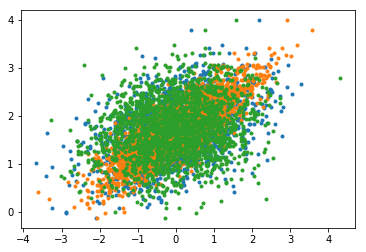

In [11]:
plt.plot(x_data, y_data, '.') #Every case has 3 instances represented by a colour
#plt.plot(x_data[:,0], y_data, '.') for x1
plt.show()

We will now estimate the parameters w and b from the noisy data.

In [12]:
steps = 500 #500 iterations through the data

x = tf.placeholder(tf. float32, shape=[None,3])
y_true = tf.placeholder(tf.float32, shape=None)

with tf.name_scope('inference') as scope: #These names help label the graph
    w = tf.Variable([[0],[0],[0]], dtype=tf.float32, name='weights')
    b = tf.Variable(0, dtype=tf.float32, name='bias')
    y_pred = tf.matmul(x,w)+b
    
with tf.name_scope('variance') as scope:
    mse = tf.reduce_mean(tf.square(y_true-y_pred)) #Taking the mean of the sum, average of the 2000 values, mean squared
    y_mean = tf.reduce_mean(y_true)
    mst = tf.reduce_mean(tf.square(y_true-y_mean))
    c_of_determination = 1-mse/mst
    
with tf.name_scope('train') as scope:
    learning_rate = 0.005
    optimizer = tf.train.GradientDescentOptimizer(learning_rate) #This line saves so much code
    train = optimizer.minimize(mse) #Minimizing the mean squared error
    
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        sess.run(train, feed_dict={x: x_data, y_true: y_data}) #Feeding the x and y data
        W, B, MSE, CD = sess.run([w, b, mse, c_of_determination], feed_dict={x: x_data, y_true: y_data})
        if (i+1) % 50 == 0:
            print("Steps {}".format(i+1), "Weights {}".format(W.T), "Bias {:.4f}".format(B), "MSE {:.4f}".format(MSE))
    print("\nCoefficient of Determination {}".format(CD))
    print("\nTrue Weights {}".format(w_real.T), "True bias {}".format(b_real))

Steps 50 Weights [[ 0.10984944  0.21425247  0.03468075]] Bias 0.6789 MSE 1.2027
Steps 100 Weights [[ 0.17567787  0.33680785  0.06288851]] Bias 1.0879 MSE 0.4408
Steps 150 Weights [[ 0.21515651  0.40665591  0.08433268]] Bias 1.3343 MSE 0.1658
Steps 200 Weights [[ 0.23885147  0.44629842  0.0999613 ]] Bias 1.4830 MSE 0.0664
Steps 250 Weights [[ 0.25308466  0.46868926  0.11102756]] Bias 1.5727 MSE 0.0303
Steps 300 Weights [[ 0.26164156  0.48126498  0.11870082]] Bias 1.6268 MSE 0.0172
Steps 350 Weights [[ 0.26679027  0.48828122  0.12393752]] Bias 1.6596 MSE 0.0124
Steps 400 Weights [[ 0.26989087  0.4921647   0.12746714]] Bias 1.6793 MSE 0.0107
Steps 450 Weights [[ 0.27175981  0.49429363  0.12982251]] Bias 1.6913 MSE 0.0100
Steps 500 Weights [[ 0.27288729  0.49544683  0.13138133]] Bias 1.6986 MSE 0.0098

Coefficient of Determination 0.9720084071159363

True Weights [[ 0.278  0.494  0.134]] True bias 1.709
